# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import glob 

%matplotlib inline
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")
df_temp_states = temp.copy() 

#### Print `temp`

In [3]:
print(df_temp_states)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
df_temp_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Select the rows where state is New York

In [5]:
df_temp_sNY = df_temp_states[df_temp_states['State']=="New York"]
df_temp_sNY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
df_temp_mean = df_temp_states.groupby('State')['Temperature'].mean()
df_temp_mean.reset_index() 

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
df_temp_ht = df_temp_states[df_temp_states['Temperature']>15]
df_temp_ht

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
df_temp_ht2 = df_temp_ht['City']
df_temp_ht2

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [12]:
df_temp_htb = df_temp_states[(df_temp_states['Temperature']>15) & (df_temp_states['Temperature']<20)]
df_temp_htb

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [17]:
df_temp_htb['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [18]:
df_mean = df_temp_states.groupby('State')['Temperature'].mean() 
df_std  = df_temp_states.groupby('State')['Temperature'].std() 
df_mean2 = df_mean.reset_index() 
df_std2  = df_std.reset_index() 

print(round(df_mean2,0))
print(round(df_std2,0))

         State  Temperature
0  Connecticut         16.0
1   New Jersey         21.0
2     New York         11.0
         State  Temperature
0  Connecticut          2.0
1   New Jersey          2.0
2     New York          8.0


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [21]:
employee = pd.read_csv("Employee.csv")
df_emp = employee.copy() 

#### Explore the data types of the Temp dataframe. Comment your results

In [25]:
df_emp.info()
# The dataframe has two numerical series: Years and Salary with integers data type. All the rest variables are string type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

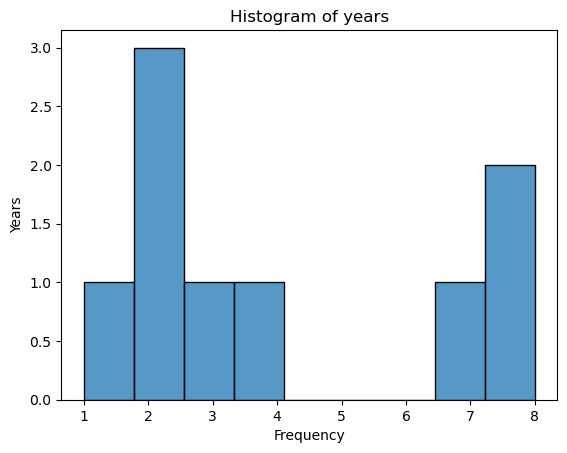

In [35]:
# Histogram of years 
sns.histplot(df_emp.Years, bins=9)

plt.title('Histogram of years')
plt.xlabel('Frequency')
plt.ylabel('Years')

plt.show()

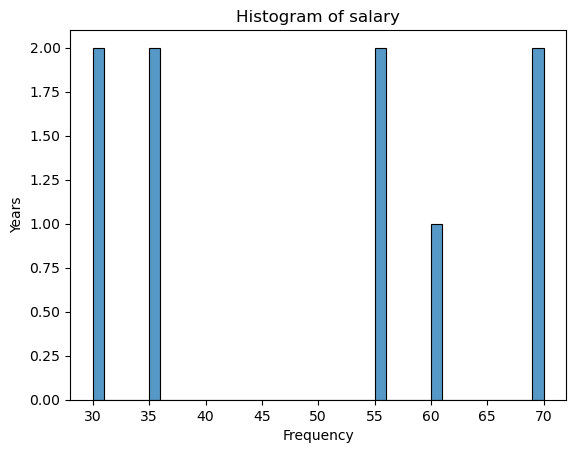

In [34]:
sns.histplot(df_emp.Salary, bins=40)

plt.title('Histogram of salary')
plt.xlabel('Frequency')
plt.ylabel('Years')

plt.show()

#### What's the average salary in this company?

In [40]:
salary_mean = round(df_emp['Salary'].mean(),2) 
print(f"The mean salary in the company is {salary_mean} euros")

The mean salary in the company is 48.89 euros


#### What's the highest salary?

In [41]:
salary_highest = round(df_emp['Salary'].max(),2) 
print(f"The highest salary in the company is {salary_highest} euros")

The highest salary in the company is 70 euros


#### What's the lowest salary?

In [42]:
salary_lowest = round(df_emp['Salary'].min(),2) 
print(f"The lowest salary in the company is {salary_lowest} euros")

The lowest salary in the company is 30 euros


#### Who are the employees with the lowest salary?

In [48]:
df_emp_sorted = df_emp.sort_values(by = 'Salary')
df_emp_sorted["Name"][df_emp_sorted.Salary==salary_lowest]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [49]:
df_emp[df_emp_sorted.Name=="David"]

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_68133/4167630453.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_emp[df_emp_sorted.Name=="David"]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [51]:
df_emp["Salary"][df_emp_sorted.Name=="David"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [52]:
df_emp[df_emp_sorted.Title=="associate"]

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_68133/2547764043.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_emp[df_emp_sorted.Title=="associate"]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [53]:
df_emp.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [54]:
df_emp[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [55]:
df_emp.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [57]:
df_emp_a55 = df_emp[(df_emp['Title']=="associate") & (df_emp['Salary']>55)]
df_emp_a55["Name"]

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [58]:
df_emp_years_salary = df_emp.groupby('Years')['Salary'].mean() 
df_emp_years_salary = df_emp_years_salary.reset_index() 

print(round(df_emp_years_salary,2))

   Years  Salary
0      1   35.00
1      2   38.33
2      3   55.00
3      4   35.00
4      7   60.00
5      8   70.00


####  What is the average Salary per title?

In [59]:
df_emp_title_salary = df_emp.groupby('Title')['Salary'].mean() 
df_emp_title_salary = df_emp_title_salary.reset_index() 

print(round(df_emp_title_salary,2))

       Title  Salary
0         VP   70.00
1    analyst   32.50
2  associate   56.67


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

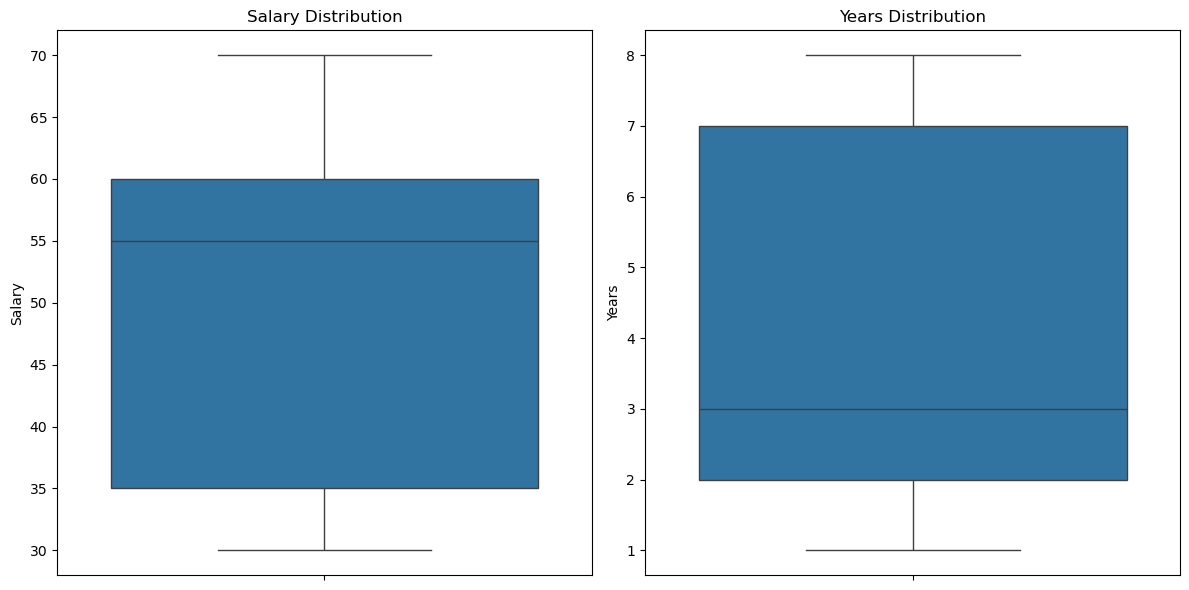

In [62]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left boxplot for Salary
sns.boxplot(data=df_emp, y='Salary', ax=axes[0])
axes[0].set_title('Salary Distribution')

# Right boxplot for Years
sns.boxplot(data=df_emp, y='Years', ax=axes[1])
axes[1].set_title('Years Distribution')

# Display the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [63]:
salary_1quartile = df_emp['Salary'].quantile(0.25)
years_1quartile = df_emp['Years'].quantile(0.25)

In [64]:
salary_3quartile = df_emp['Salary'].quantile(0.75)
years_3quartile = df_emp['Years'].quantile(0.75)

#### Is the mean salary per gender different?

In [65]:
df_emp_g_s = df_emp.groupby('Gender')['Salary'].mean() 
df_emp_g_s = df_emp_g_s.reset_index() 

print(round(df_emp_g_s,2))

  Gender  Salary
0      F    47.5
1      M    50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [71]:
num_emp = df_emp.select_dtypes(include="number")
num_emp.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [72]:
orders = pd.read_csv("Orders.csv")
df_orders = orders.copy() 

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [73]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [75]:
round(df_orders.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.22,152771.37,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.13,13106.17,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.93,0.25,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.61,3.42,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.61,1.93,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.73,2.27,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.02,180.42,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.12,22.10,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.32,1713.17,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.39,309.06,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [76]:
price_mean = df_orders["UnitPrice"].mean()
price_mean

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [77]:
price_lowest = df_orders["UnitPrice"].min()
price_lowest

0.0

In [78]:
price_highest = df_orders["UnitPrice"].max()
price_highest

8142.75

#### Select all the customers we have in Spain

In [98]:
df_spain = df_orders[df_orders.Country=="Spain"]
df_customer_id_sp = df_spain["CustomerID"].unique()
print(len(df_customer_id_sp))
df_customer_id_sp

30


array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [109]:
df_orders_spain = df_spain.CustomerID.value_counts()
df_orders_spain.reset_index()

,CustomerID,count
0,12540,478
1,12484,346
2,12539,273
3,17097,211
4,12597,206
5,12502,147
6,12556,121
7,12546,69
8,12462,62
9,12354,58


#### Select all the customers who have bought more than 50 items ?

In [146]:
orders_customer = df_orders.groupby(['Country','CustomerID']).size().reset_index(name='Count')
orders_customer50 = orders_customer[orders_customer['Count']>50]
orders_customer50 = orders_customer50.sort_values(by='Count', ascending=False)
print(orders_customer50)

             Country  CustomerID  Count
4016  United Kingdom       17841   7847
81              EIRE       14911   5677
1325  United Kingdom       14096   5111
424   United Kingdom       12748   4596
1690  United Kingdom       14606   2700
...              ...         ...    ...
797   United Kingdom       13336     51
3627  United Kingdom       17297     51
2758  United Kingdom       16092     51
811   United Kingdom       13354     51
3689  United Kingdom       17383     51

[1908 rows x 3 columns]


#### Select orders from Spain that are above 50 items

In [148]:
orders_customer50_spain = orders_customer50[orders_customer50['Country']=="Spain"]
orders_customer50_spain

,Country,CustomerID,Count
373,Spain,12540,478
367,Spain,12484,346
372,Spain,12539,273
386,Spain,17097,211
385,Spain,12597,206
368,Spain,12502,147
382,Spain,12556,121
377,Spain,12546,69
366,Spain,12462,62
357,Spain,12354,58


#### Select all free orders

In [157]:
df_orders_free = df_orders.sort_values(by='amount_spent', ascending=True)
df_orders_free = df_orders_free[df_orders_free['amount_spent']==0]
orders_free = df_orders_free['InvoiceNo']
print(orders_free)


352746    577129
53788     543599
322279    574469
137127    554037
208950    562973
128641    553000
25379     539722
329007    574920
329006    574920
197173    561669
97430     548871
320407    574252
256263    568158
29080     540372
29082     540372
319882    574138
194648    561284
85671     547417
370473    578841
223931    564651
223932    564651
6914      537197
223933    564651
328385    574879
92875     548318
358629    577696
334242    575579
334243    575579
107192    550188
286507    571035
354170    577314
259399    568384
320049    574175
353097    577168
223934    564651
22539     539263
34494     541109
307092    572893
199711    561916
273926    569716
Name: InvoiceNo, dtype: int64


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [160]:
df_orders.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [165]:
df_orders_lunch_bag = df_orders[df_orders['Description'].str.contains('lunch box', case=False, na=False)]
df_orders_lunch_bag.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
36,36,536370,22659,2010,12,3,8,lunch box i love london,24,2010-12-01 08:45:00,1.95,12583,France,46.8
37,37,536370,22631,2010,12,3,8,circus parade lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
94,94,536378,21559,2010,12,3,9,strawberry lunch box with cutlery,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3
95,95,536378,22352,2010,12,3,9,lunch box with cutlery retrospot,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [166]:
df_orders_lunch_bag_2011 = df_orders_lunch_bag[df_orders_lunch_bag['year']==2011]

In [167]:
df_orders_lunch_bag_2011.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26440,42779,540021,22630,2011,1,2,12,dolly girl lunch box,1,2011-01-04 12:51:00,1.95,17841,United Kingdom,1.95
27110,44171,540157,21559,2011,1,3,11,strawberry lunch box with cutlery,6,2011-01-05 11:41:00,2.55,15311,United Kingdom,15.30
27111,44172,540157,21561,2011,1,3,11,dinosaur lunch box with cutlery,3,2011-01-05 11:41:00,2.55,15311,United Kingdom,7.65
27112,44173,540157,21558,2011,1,3,11,skull lunch box with cutlery,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55
27113,44174,540157,22352,2011,1,3,11,lunch box with cutlery retrospot,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55


#### Show the frequency distribution of the amount spent in Spain.

In [168]:
df_orders_Spain_amount = df_orders[df_orders['Country']=='Spain']
df_orders_Spain_amount.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


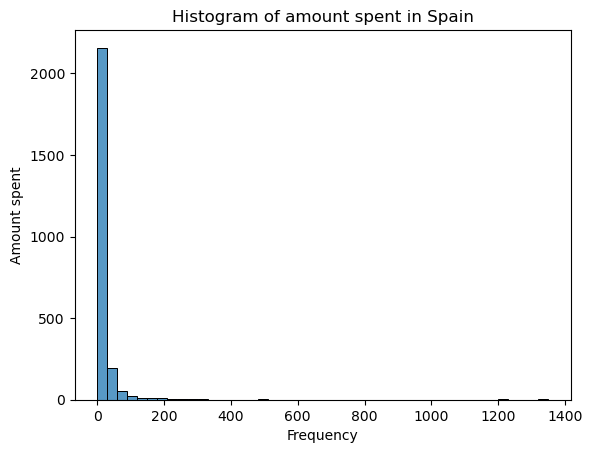

In [170]:
sns.histplot(df_orders_Spain_amount.amount_spent, bins=45)
plt.title('Histogram of amount spent in Spain')
plt.xlabel('Frequency')
plt.ylabel('Amount spent')

plt.show()

#### Select all orders made in the month of August

In [171]:
df_orders_august = df_orders[df_orders['month']==8]
df_orders_august.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [172]:
df_orders_aug_country = df_orders_august.Country.value_counts()
df_orders_aug_country.reset_index()

,Country,count
0,United Kingdom,23105
1,Germany,795
2,EIRE,593
3,France,569
4,Netherlands,280
5,Switzerland,267
6,Spain,252
7,Belgium,194
8,Israel,171
9,Channel Islands,140


#### What's the  average amount of money spent by country

In [181]:
df_orders_amount_country  = df_orders.groupby('Country')['amount_spent'].mean().reset_index()
print(round(df_orders_amount_country,0))

                 Country  amount_spent
0              Australia         117.0
1                Austria          26.0
2                Bahrain          32.0
3                Belgium          20.0
4                 Brazil          36.0
5                 Canada          24.0
6        Channel Islands          27.0
7                 Cyprus          22.0
8         Czech Republic          33.0
9                Denmark          50.0
10                  EIRE          37.0
11    European Community          22.0
12               Finland          33.0
13                France          25.0
14               Germany          25.0
15                Greece          33.0
16               Iceland          24.0
17                Israel          29.0
18                 Italy          23.0
19                 Japan         117.0
20               Lebanon          38.0
21             Lithuania          47.0
22                 Malta          24.0
23           Netherlands         121.0
24                Norway 

#### What's the most expensive item?

In [189]:
UnitPrice_max = df_orders.UnitPrice.max()
df_orders_prod_price_max = df_orders['Description'][df_orders['UnitPrice']==UnitPrice_max]
df_orders_prod_price_max

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [190]:
df_orders_amount_year  = df_orders.groupby('year')['amount_spent'].mean().reset_index()
print(round(df_orders_amount_year,0))

   year  amount_spent
0  2010          22.0
1  2011          22.0
